<a href="https://colab.research.google.com/github/kirflex/CV2/blob/main/nn_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
 

In [48]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [49]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

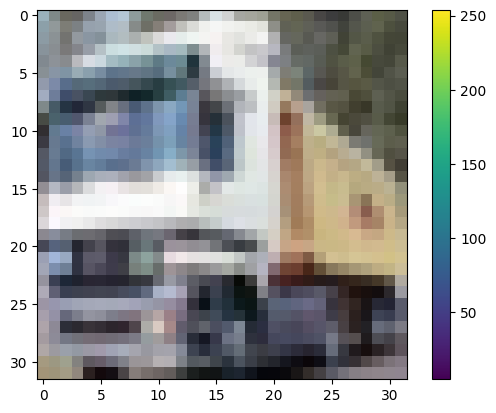

In [50]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [51]:
x_train = x_train/ 255
x_test = x_test/ 255

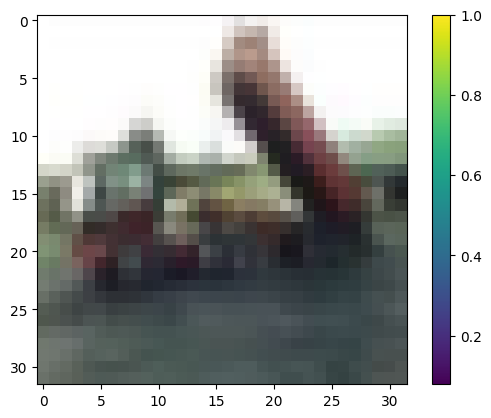

In [52]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)

In [58]:
model = keras.Sequential([
                          keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.Conv2D(32, 3, activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(20, activation="softmax")
])

In [59]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               802944    
                                                                 
 dense_19 (Dense)            (None, 20)                2580      
                                                      

In [61]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 142s 90ms/step - loss: 1.9056 - accuracy: 0.3169
Epoch 2/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5331 - accuracy: 0.4542
Epoch 3/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4000 - accuracy: 0.5045
Epoch 4/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.2972 - accuracy: 0.5388
Epoch 5/20
1563/1563 [==============================] - 146s 93ms/step - loss: 1.1957 - accuracy: 0.5758
Epoch 6/20
1563/1563 [==============================] - 140s 89ms/step - loss: 1.1036 - accuracy: 0.6086
Epoch 7/20
1563/1563 [==============================] - 140s 90ms/step - loss: 1.0225 - accuracy: 0.6413
Epoch 8/20
1563/1563 [==============================] - 140s 90ms/step - loss: 0.9466 - accuracy: 0.6676
Epoch 9/20
1563/1563 [==============================] - 140s 90ms/step - loss: 0.8759 - accuracy: 0.6951
Epoch 10/20
1563/1563 [==============================] 

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 21ms/step - loss: 1.4106 - accuracy: 0.6544
Test loss: 1.4105980396270752
Test accuracy: 0.6543999910354614


In [63]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 33s 21ms/step


In [64]:
predictions[0]

array([4.3092916e-09, 1.0367210e-08, 7.3977694e-04, 8.7989671e-03,
       7.6720702e-05, 3.3956423e-04, 9.9002212e-01, 2.2942686e-05,
       1.5589244e-10, 2.1016520e-09, 5.7011305e-11, 3.2394873e-09,
       1.3341818e-10, 1.3044595e-10, 3.8416464e-10, 4.3504830e-10,
       6.7190120e-10, 4.8621634e-10, 2.6469344e-09, 9.1309529e-09],
      dtype=float32)

In [66]:
np.argmax(predictions[0])

6

In [67]:
y_train[1000]

array([9], dtype=uint8)

Text(0.5, 0, '[9]')

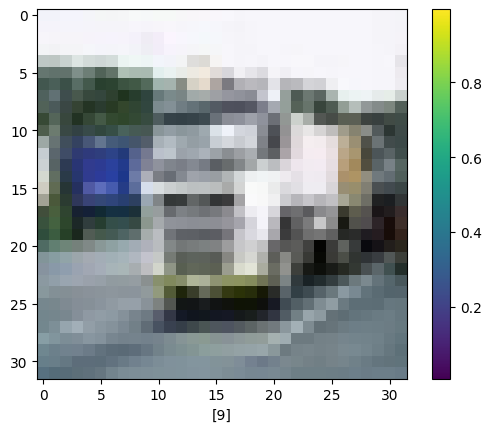

In [68]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid(False)
plt.xlabel(y_train[1000])